# AI Saturdays Training Exercise - Bank Classifier
Las campañas de marketing del banco dependen de los datos de los clientes. El tamaño de estos datos es tan grande que es imposible que un analista de datos extraiga buena información que pueda ayudar en el proceso de toma de decisiones.

Los modelos de aprendizaje automático están ayudando completamente en el desempeño de estas campañas. 

## Dataset

Este conjunto de datos está relacionado con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder a si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

El objetivo es predecir si el cliente se suscribirá (sí/no) a un depósito a plazo, construyendo un modelo de clasificación utilizando árboles de decisión.

## Summay of data
### Categorical Variables :
job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student

marital : married, single, divorced

education: secondary, tertiary, primary, unknown

default : yes, no

housing : yes, no

loan : yes, no

deposit : yes, no (Dependent Variable)

contact : unknown, cellular, telephone

month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

poutcome: unknown, other, failure, success


### Numerical Variables:
age
balance
day
duration
campaign
pdays
previous

In [24]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [25]:
# Crear dataframe a partir de .csv
df = pd.read_csv('bank.csv')

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# Mostrar las primeras 10 filas (TO-DO)

Filas: 11162 Cols: 17


In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [27]:
# Hallar número de valores únicos en cada columna
for col in df:
    print(col, df[col].unique())
    print("")

age [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital ['married' 'single' 'divorced']

education ['secondary' 'tertiary' 'primary' 'unknown']

default ['no' 'yes']

balance [2343   45 1270 ... 1594 2593 -134]

housing ['yes' 'no']

loan ['no' 'yes']

contact ['unknown' 'cellular' 'telephone']

day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration [1042 1467 1389 ... 1504  818 1812]

campaign [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]

pdays [ -

In [28]:
# Comprobar la existencia de valores nulos en el dataset
df[df.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [29]:
# Mostrar información general del dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [30]:
# Descripción analítica básica del dataframe


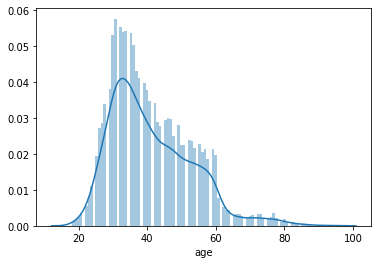

In [31]:
# Distribución de la Edad
sns.distplot(df.age, bins=100)

### Convertir datos categóricos 

In [32]:
# Hacer una copia primero!!
bank_data = df.copy()


#### Job

In [33]:
# Explorar Personas que hicieron un depósito Vs Categoría de trabajo
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [34]:
# Diferentes tipos de categorías de trabajo y sus cuentas
bank_data.job.value_counts()


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [35]:
# Combinar trabajos similares en categorías
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [36]:
# New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

#### poutcome

In [37]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [38]:
# Combinar "unknown" y "other" como "other" no es realmente compatible con el "success" o el "failure
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

#### contact

In [39]:
# Drop 'contact' 
bank_data.drop('contact', axis=1, inplace=True)

#### default

In [40]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#### housing, loan, deposit

In [41]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [42]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [43]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [44]:
# pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior
# -1 significa que el cliente no fue contactado previamente

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [45]:
# El mapa padys=-1 en un valor grande (se usa 10000) para indicar que está tan lejos en el pasado que no tiene efecto
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000


In [46]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)
#bank_data.drop('month', axis=1, inplace=True)
#bank_data.drop('day', axis=1, inplace=True)

In [65]:
bank_data.head()

,age,job,marital,education,balance,day,month,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,5,may,1042,1,0,unknown,0,1,0,1,0.0001
1,56,white-collar,married,secondary,45,5,may,1467,1,0,unknown,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,5,may,1389,1,0,unknown,0,1,0,1,0.0001
3,55,pink-collar,married,secondary,2476,5,may,579,1,0,unknown,0,1,0,1,0.0001
4,54,white-collar,married,tertiary,184,5,may,673,2,0,unknown,0,0,0,1,0.0001


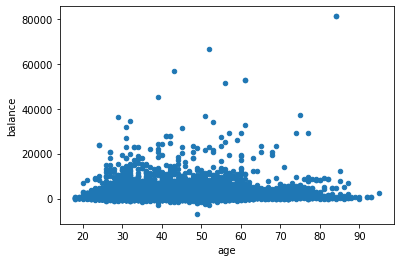

In [66]:
bank_data.plot(kind="scatter",x='age',y='balance',c)

### Convert to dummy values

In [48]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome','month'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome','month'])
bank_with_dummies.head()

,age,balance,day,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,5,1042,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,56,45,5,1467,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,41,1270,5,1389,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,55,2476,5,579,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,54,184,5,673,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [49]:
bank_with_dummies.shape


(11162, 40)

In [50]:
bank_with_dummies.describe()


,age,balance,day,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,...,0.009855,0.069522,0.030819,0.135639,0.109479,0.024727,0.253001,0.084483,0.035119,0.028579
std,11.913369,3225.413326,8.420740,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,...,0.098786,0.254350,0.172834,0.342420,0.312253,0.155298,0.434751,0.278123,0.184089,0.166628
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


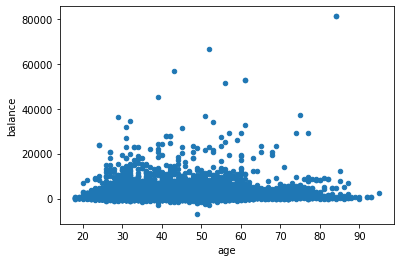

In [51]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# ¿Qué interpretas?

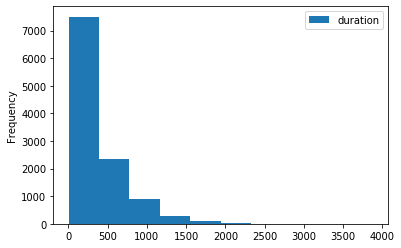

In [52]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');


In [53]:
# Personas que se inscriben en un depósito a plazo
bank_with_dummies[bank_data.deposit_cat == 1].describe()


,age,balance,day,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,...,0.018907,0.083381,0.026848,0.118548,0.103233,0.046890,0.174891,0.076196,0.061070,0.050860
std,13.497781,3501.104777,8.501875,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,...,0.136210,0.276483,0.161655,0.323286,0.304292,0.211423,0.379910,0.265336,0.239482,0.219733
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


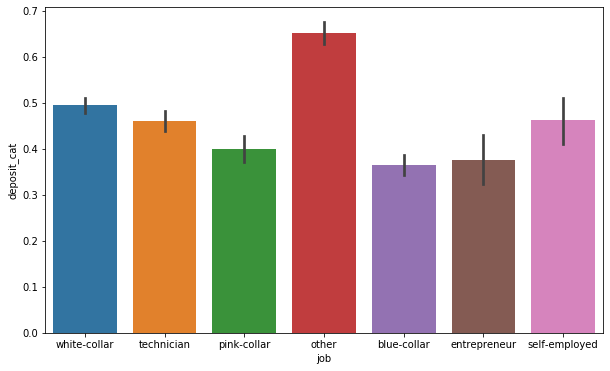

In [54]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

### Establecer las relaciones entre las features


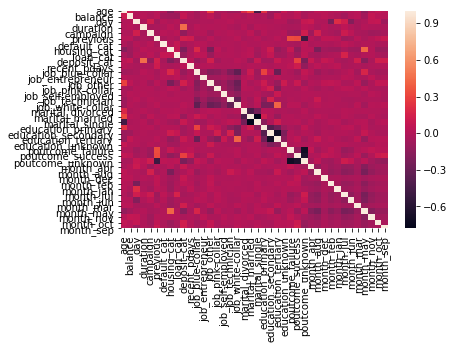

In [57]:
# Mostrar matriz de correlación de variables
# Pista: explore plt.matshow y corr() de un dataframe
bankcl = bank_with_dummies
corr = bankcl.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [74]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz
# útil para apreciar relaciones lineales

# Pista: explore pd.plotting.scatter_matrix
#pd.plotting.scatter_matrix(bankcl, alpha=0.2)

In [58]:
bankcl.head()

,age,balance,day,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,5,1042,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,56,45,5,1467,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,41,1270,5,1389,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,55,2476,5,579,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,54,184,5,673,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Partir el test en cierta proporción (¡experimentar!)
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [60]:
# Definir un clasificador
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)
# Predecir valores para las variables independientes de test
dt2_score_train = dt2.score(data_train, label_train)
dt2_score_test = dt2.score(data_test, label_test)
# Calcular la precisión
print(dt2_score_train)
print(dt2_score_test)
# Pista: explorar sklearn.metrics.accuracy_score
#sklearn.metrics.accuracy_score()

0.7285250307985217
0.7268248992386923


In [62]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7653381101656964


#### Compare Training and Testing scores for various tree depths used


In [63]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
max                     1.0   0.7653381101656964


[Text(167.4, 181.2, 'X[3] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(83.7, 108.72, 'X[25] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(41.85, 36.23999999999998, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(209.25, 36.23999999999998, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(292.95, 36.23999999999998, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

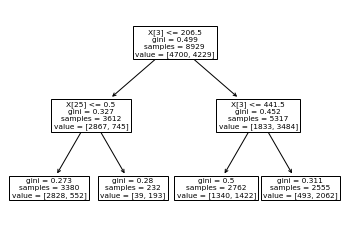

In [64]:
# Uncomment below to generate the digraph Tree.
features = data_test.columns
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)
tree.plot_tree(dt2)

### Mejor resultado conseguido por nosotros -> Accuracy: 0.8943918426802622

